In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# **Initial Analysis. **

1. Clean both tran and test data. 
2. Analyze the data to see the insights. 
3. Extract relevant data 
4. Further Explore.


# **Data Exploaration**
Initial exploration on the training data. Performing data cleaning tasks. 

In [2]:
import pandas as pd
import numpy as np

# read in all our data
house_price_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

# set seed for reproducibility
np.random.seed(0) 

In [3]:
house_price_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_price_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**** Missing Values in coloumns ****

In [5]:
#total number of coloumns
len(house_price_data.columns)#  TOTAL 81
#total number of rows
len(house_price_data) # TOTAL 1460

1460

In [6]:
#number of missing data points per column
missing_values_count = house_price_data.isnull().sum()
# print(missing_values_count)
# Percentage of missing values 
total_cells = np.product(house_price_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("percent_missing: ",percent_missing)  # 5.88 % 
#only 5.8 percent missing values. 


percent_missing:  5.889565364451209


In [7]:
# remove all the rows that contain a missing value
house_price_data.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [8]:
#sort the missing values series
sorted_missing_values_count = missing_values_count.sort_values(ascending=False)


#  all columns with at least one missing value
columns_with_no_na = house_price_data.dropna(axis=1)
columns_with_no_na.head()

# just how much columns did we lose?
columns_with_na= house_price_data.shape[1] - columns_with_no_na.shape[1]
print("Columns in original dataset: %d \n" % house_price_data.shape[1])
print("Columns with na's  %d" % columns_with_na)

#to cross check how many coloumns, we have at least one missing value
coloumn_missingvalues_count  = sorted_missing_values_count[sorted_missing_values_count != 0]
print("columns with missing values " , len(coloumn_missingvalues_count)) 
# there are 19 columns with na


Columns in original dataset: 81 

Columns with na's  19
columns with missing values  19


Sorting the dataframe based on missing value count, the first 19 column names are seen. 

In [9]:
# Reviewing all the 19 columns and noting the count of missing values in each column. 
print(sorted_missing_values_count[0:19])
column_names_with_nv = sorted_missing_values_count[0:19].keys()
house_price_data[column_names_with_nv]
#Getting all the rows where bsmtfintype2 is null.
# house_price_data.loc[house_price_data['BsmtFinType2'].isnull()]


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,MasVnrType,Electrical
0,NaN,NaN,NaN,NaN,NaN,65.0,2003.0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,GLQ,196.0,BrkFace,SBrkr
1,NaN,NaN,NaN,NaN,TA,80.0,1976.0,TA,Attchd,RFn,TA,Unf,Gd,Gd,TA,ALQ,0.0,None,SBrkr
2,NaN,NaN,NaN,NaN,TA,68.0,2001.0,TA,Attchd,RFn,TA,Unf,Mn,Gd,TA,GLQ,162.0,BrkFace,SBrkr
3,NaN,NaN,NaN,NaN,Gd,60.0,1998.0,TA,Detchd,Unf,TA,Unf,No,TA,Gd,ALQ,0.0,None,SBrkr
4,NaN,NaN,NaN,NaN,TA,84.0,2000.0,TA,Attchd,RFn,TA,Unf,Av,Gd,TA,GLQ,350.0,BrkFace,SBrkr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,TA,62.0,1999.0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,Unf,0.0,None,SBrkr
1456,NaN,NaN,NaN,MnPrv,TA,85.0,1978.0,TA,Attchd,Unf,TA,Rec,No,Gd,TA,ALQ,119.0,Stone,SBrkr
1457,NaN,Shed,NaN,GdPrv,Gd,66.0,1941.0,TA,Attchd,RFn,TA,Unf,No,TA,Gd,GLQ,0.0,None,SBrkr
1458,NaN,NaN,NaN,NaN,NaN,68.0,1950.0,TA,Attchd,Unf,TA,Rec,Mn,TA,TA,GLQ,0.0,None,FuseA


****Analysis for the missing values in each column. (Imputation)****
Seeing from the results it seems that PoolQC, MiscFeature, Alley, Fence missing more than 50 % of the values. 
In the case of PoolQC, we can assume that not every house has pool avalaible in it and only few houses have a pool, thus we can replace the missing values with NA (no pool). 
Similarly MiscFeature, Alley, Fence, FireplaceQu missing values can be filled with NA as not every house would have these things.  
LotFrontage  As this is numerical and are values in feet, so the missing values can be replaced by the mean value. 
GarageFinish missing values with NA
GarageYrBlt, GarageCond, GarageFinish, GarageQual:  Missing values can be replaced with NA as it is assumed they are linked with garage type because if theres no garage then there can't be a value for these instances. 
BsmtFinType2, BsmtExposure, BsmtQual, BsmtFinType1       missing values with NA
MasVnrArea missing values in masonry vaneer area can be filled with 0.0. 
MasVnrType missing values can be filled with None. 
Electrical has one missing value, which can be replaced with NA(in this case Not avalibale.) - which can be changed after seeing the correlation with other features. 





In [10]:
def fillMissingValues(df):

    complete_house_price_data = df.copy()

    complete_house_price_data =complete_house_price_data.fillna({'PoolQC':'NA', 'MiscFeature':'NA','Alley':'NA',
                                                                 'Fence':'NA', 'FireplaceQu':'NA'})


    complete_house_price_data = complete_house_price_data.fillna({'LotFrontage': complete_house_price_data['LotFrontage'].mean()})

    complete_house_price_data =complete_house_price_data.fillna({'GarageYrBlt':'NA', 'GarageCond':'NA','GarageType':"NA","GarageQual":"NA",
                                               'GarageFinish':'NA', 'GarageFinish':'NA'})
    complete_house_price_data =complete_house_price_data.fillna({'BsmtFinType2':'NA', 'BsmtExposure':'NA',
                                               'BsmtQual':'NA', 'BsmtCond':'NA', 'BsmtFinType1':'NA'})

    complete_house_price_data = complete_house_price_data.fillna({'MasVnrArea':0})

    complete_house_price_data = complete_house_price_data.fillna({'MasVnrType':"None"})

    complete_house_price_data = complete_house_price_data.fillna({'Electrical':"NA"})

    complete_house_price_data.isnull().any()

    return complete_house_price_data

# complete_house_price_data[column_names_with_nv].isnull().sum()
#Check to confirm data is free from missing values.
#The missing values are filled. 
# complete_house_price_data = complete_house_pri/ce_data.drop(columns=['Id'])

CLEAN BOTH TRAIN AND TEST DATA 

In [11]:
train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv",  index_col="Id")
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv",  index_col="Id")
# Merge the splits so we can process them together
df = pd.concat([train_data, test_data])
# df = fillMissingValues (df)

mv=df.isnull().sum()

sorted_missing_values_count = mv.sort_values(ascending=False)
print(sorted_missing_values_count[0:35])
column_names_with_nv = sorted_missing_values_count[0:35].keys()
df[column_names_with_nv]

# Reform splits
# df_train = df.loc[train_data.index, :]
# df_test = df.loc[test_data.index, :]
# print(df_train.shape,df_test.shape)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
BsmtFullBath       2
Functional         2
Exterior2nd        1
Exterior1st        1
GarageArea         1
GarageCars         1
SaleType           1
KitchenQual        1
BsmtFinSF1         1
Electrical         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
dtype: int64


,PoolQC,MiscFeature,Alley,Fence,SalePrice,FireplaceQu,LotFrontage,GarageCond,GarageFinish,GarageQual,...,Exterior1st,GarageArea,GarageCars,SaleType,KitchenQual,BsmtFinSF1,Electrical,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,208500.0,NaN,65.0,TA,RFn,TA,...,VinylSd,548.0,2.0,WD,Gd,706.0,SBrkr,0.0,150.0,856.0
2,NaN,NaN,NaN,NaN,181500.0,TA,80.0,TA,RFn,TA,...,MetalSd,460.0,2.0,WD,TA,978.0,SBrkr,0.0,284.0,1262.0
3,NaN,NaN,NaN,NaN,223500.0,TA,68.0,TA,RFn,TA,...,VinylSd,608.0,2.0,WD,Gd,486.0,SBrkr,0.0,434.0,920.0
4,NaN,NaN,NaN,NaN,140000.0,Gd,60.0,TA,Unf,TA,...,Wd Sdng,642.0,3.0,WD,Gd,216.0,SBrkr,0.0,540.0,756.0
5,NaN,NaN,NaN,NaN,250000.0,TA,84.0,TA,RFn,TA,...,VinylSd,836.0,3.0,WD,Gd,655.0,SBrkr,0.0,490.0,1145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,...,CemntBd,0.0,0.0,WD,TA,0.0,SBrkr,0.0,546.0,546.0
2916,NaN,NaN,NaN,NaN,NaN,NaN,21.0,TA,Unf,TA,...,CemntBd,286.0,1.0,WD,TA,252.0,SBrkr,0.0,294.0,546.0
2917,NaN,NaN,NaN,NaN,NaN,TA,160.0,TA,Unf,TA,...,VinylSd,576.0,2.0,WD,TA,1224.0,SBrkr,0.0,0.0,1224.0


Seleting columns based on intution and relevancy with sale price. 
 LotArea , Street , Utilities, Neighborhood, BldgType , HouseStyle, OverallQual,
 OverallCond, YearBuilt, ExterQual, ExterCond, Foundation, BsmtCond, TotalBsmtSF,
 Heating, HeatingQC, CentralAir, Electrical, 'BedroomAbvGr', 'KitchenAbvGr', GarageType, GarageArea, PoolQC, YrSold, SaleType,SaleCondition, SalePrice

In [12]:

subset_df1=df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','SalePrice']]

subset_df2=df[['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','SalePrice']]
subset_df3=df[['Heating','HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd','SalePrice']]
subset_df4=df[['Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC','SalePrice']]
subset_df5=df[['Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition','SalePrice']]


<AxesSubplot:>

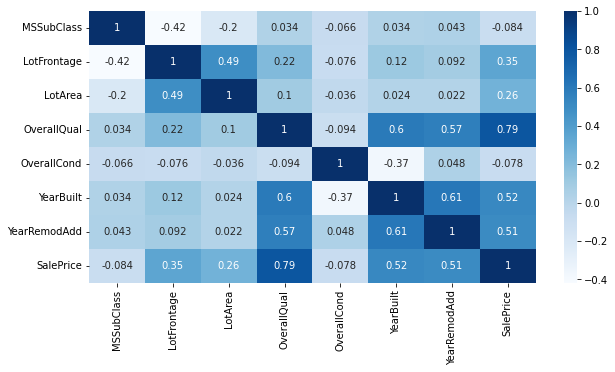

In [13]:
# subset_df1.corr()
plt.figure(figsize=(10,5))
sns.heatmap(subset_df1.corr(),cbar=True,annot=True,cmap='Blues')


<AxesSubplot:>

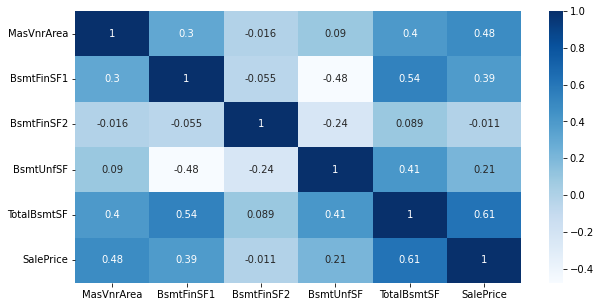

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(subset_df2.corr(),cbar=True,annot=True,cmap='Blues')


<AxesSubplot:>

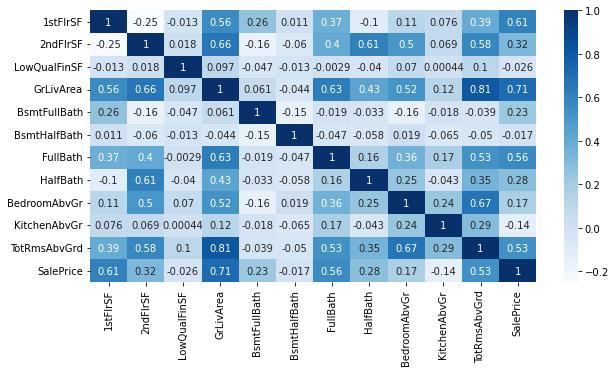

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(subset_df3.corr(),cbar=True,annot=True,cmap='Blues')


<AxesSubplot:>

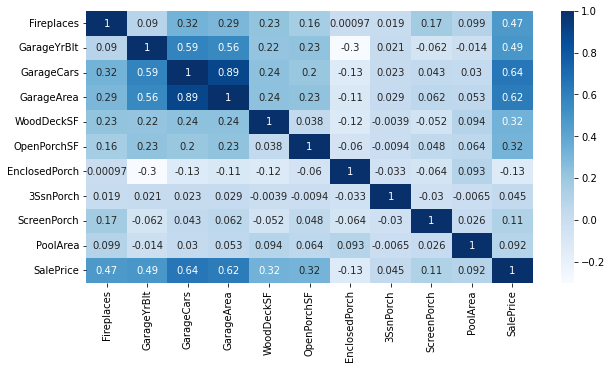

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(subset_df4.corr(),cbar=True,annot=True,cmap='Blues')


<AxesSubplot:>

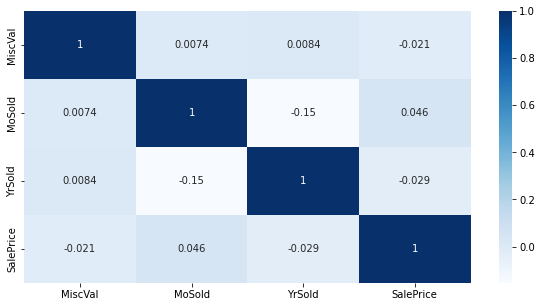

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(subset_df5.corr(),cbar=True,annot=True,cmap='Blues')
